**RUNNING LOCALLY, NOT ON GREENPLANET**

In [1]:
import xarray
import cartopy
import matplotlib.pyplot as mp

In [2]:
file_root = '/Users/baird/Dropbox/_run_info_CESM/cesm2_runs/example_cesm2_outfiles/clm_surfdata/'
file_name = 'surfdata_0.9x1.25_78pfts_CMIP6_simyr2000_c170824.nc'

In [3]:
surfdata_ds = xarray.open_dataset(file_root+file_name)

In [5]:
pct_crop = surfdata_ds['PCT_CROP'].values
pct_cft = surfdata_ds['PCT_CFT'].values

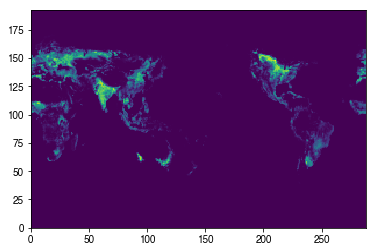

In [7]:
mp.pcolormesh(pct_crop)

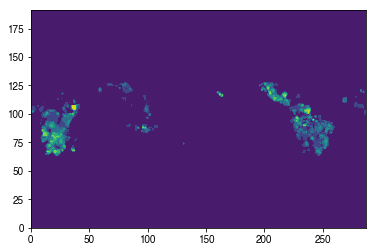

In [8]:
mp.contourf(pct_cft[60,:,:])

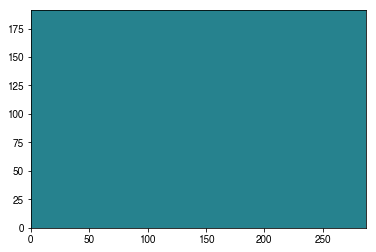

In [9]:
mp.contourf(pct_cft[6,:,:])